--------------------------------------
# ESTADÍSTICA DESCRIPTIVA 
-------------------------------------------

In [23]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [24]:
from scipy import stats 
import statsmodels as sm
import pingouin as pg 


# 1.1 Estimaciones de Ubicación (o medidas de tendencia central)

La tendencia central describe la distribución de los datos concentrándose en la locación central en torno al cual se agrupan todos los demás datos. Es lo contrario de la dispersión.

## Términos Clave para Estimaciones de Ubicación

- **Media**: La suma de todos los valores dividida por el número de valores.
  - Sinónimo: promedio

- **Media ponderada**: La suma de todos los valores multiplicados por un peso dividida por la suma de los pesos.
  - Sinónimo: promedio ponderado

- **Mediana**: El valor tal que la mitad de los datos está por encima y por debajo.
  - Sinónimo: percentil 50

- **Percentil**: El valor tal que P por ciento de los datos está por debajo.
  - Sinónimo: cuantil

- **Mediana ponderada**: El valor tal que la mitad de la suma de los pesos está por encima y por debajo de los datos ordenados.

- **Media recortada**: El promedio de todos los valores después de eliminar un número fijo de valores extremos.
  - Sinónimo: media truncada

- **Robusto**: No sensible a valores extremos.
  - Sinónimo: resistente

- **Valor atípico**: Un valor de datos que es muy diferente de la mayoría de los datos.
  - Sinónimo: valor extremo



## Métricas y Estimaciones

### Media

La estimación más básica de la ubicación es la media, o valor promedio. La media es la suma de todos los valores dividida por el número de valores. Considera el siguiente conjunto de números: {3, 5, 1, 2}. La media es:

$ \text{Media} = \frac{3 + 5 + 1 + 2}{4} = \frac{11}{4} = 2.75 $

Verás que se usa el símbolo $\bar{x}$ (pronunciado "x-barra") para representar la media de una muestra de una población. La fórmula para calcular la media para un conjunto de $n$ valores $x_1, x_2, \ldots, x_n$ es:

$ \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $

Calculo la media con: 

> 1.SciPy 

> 2.Pandas 

> 3.Statmodels

> 4.Pingouine

In [25]:
import statsmodels.api as sm
from scipy import stats
import statsmodels.api as sm
import pingouin as pg 
import pandas as pd
import numpy as np

#Gráficas: 
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
m = np.array([9,8,7,6,5,4,3,2,1])
print(f'Array de m: \n', m)

df = pd.DataFrame({'values': [9,8,7,6,5,4,3,2,1]})
print(f'El dataframe: \n', df)

Array de m: 
 [9 8 7 6 5 4 3 2 1]
El dataframe: 
    values
0       9
1       8
2       7
3       6
4       5
5       4
6       3
7       2
8       1


In [27]:
# Media con SciPy 
mean_scipy = np.mean(m)
print("Media (SciPy):", mean_scipy)

# Media con Pandas 
mean_pandas = df['values'].mean()
print("\nMedia (Pandas):", mean_pandas)

# Media con statmodels
df['intercept'] = 1 
print('\nEl dataframe  agregado la columna intercept para calcular la media con statmodels: \n', df)

model = sm.OLS(df['values'], df['intercept']).fit() #Ajustar un modelo de regresión sin variables explicativas  

mean_statmodels = model.params['intercept']
print("\nMedia (Statsmodels):", mean_statmodels)    

# No hay una función para calcular la media en Pingouine, así que utilizamos la función mean de Pandas
mean_pingouine = df['values'].mean()
print("\nMedia (Pingouine - igual que la de Pandas):", mean_pingouine)

# No hay una función para calcular la media en Pingouine, TAMBIÉN podemos utilizar la función mean de NumPy
mean_pingouine = np.mean(df['values'])
print("Media (Pingouine - igual que la de Pandas y SciPy):", mean_pingouine)

Media (SciPy): 5.0

Media (Pandas): 5.0

El dataframe  agregado la columna intercept para calcular la media con statmodels: 
    values  intercept
0       9          1
1       8          1
2       7          1
3       6          1
4       5          1
5       4          1
6       3          1
7       2          1
8       1          1

Media (Statsmodels): 4.999999999999999

Media (Pingouine - igual que la de Pandas): 5.0
Media (Pingouine - igual que la de Pandas y SciPy): 5.0


### Media Recortada = trimmed mean

Se calcula eliminando un número fijo de valores ordenados en cada extremo y luego tomando un promedio de los valores restantes. Representando los valores ordenados por $x_1, x_2, \ldots, x_n$ donde $x_1$ es el valor más pequeño y $x_n$ el más grande. 

La fórmula para calcular la media recortada con $p$ valores más pequeños y más grandes omitidos es:

$\bar{x}_{\text{recortada}} = \frac{1}{n - 2p} \sum_{i=p+1}^{n-p} x_i$

Una media recortada elimina la influencia de valores extremos.

Calculo la media recortada con: 

> 1.SciPy 

> 2.Pandas 

> 3.Statmodels

> 4.Pingouine

In [28]:
from scipy.stats import trim_mean
import statsmodels.api as sm

In [29]:
r = np.array([9,8,7,6,5,4,3,2,1])
print(f'Array de r: \n', r)

df = pd.DataFrame({'values': [9,8,7,6,5,4,3,2,1]})
print(f'\nEl dataframe, df: \n', df)

Array de r: 
 [9 8 7 6 5 4 3 2 1]

El dataframe, df: 
    values
0       9
1       8
2       7
3       6
4       5
5       4
6       3
7       2
8       1


In [30]:
# Media recortada con SciPy
trimmed_mean_scipy = trim_mean(r, 0.1) #Recorta el 10% de cada extremo 
print("Media recortada usando SciPy:", trimmed_mean_scipy)

# Media recortada con Pandas 

#Selecciona el 80% central de los datos (desde el 10% hasta el 90%) utilizando iloc
trimmed_df = df['values'].sort_values().iloc[int(0.1*len(df)):int(0.9*len(df))]
trimmed_mean_pandas = trimmed_df.mean()
print("\nMedia recortada usando Pandas:", trimmed_mean_pandas)

#Media recortada con Statsmodels 
def trimmed_mean(data, proportiontocut): 
    n = len(data)
    k = int(n * proportiontocut)
    trimmed_data = np.sort(data)[k:n-k]
    return np.mean(trimmed_data)

trimmed_mean_statsmodels = trimmed_mean(df['values'], 0.1)
print("\nMedia recortada usando una función personalizada con Statsmodels:", trimmed_mean_statsmodels)

# Media recortada con Pingouine (usa numpy)
trimmed_mean_numpy = np.mean(np.sort(df['values'])[int(0.1*len(df)):int(0.9*len(df))])
print("\nMedia recortada usando NumPy:", trimmed_mean_numpy)

Media recortada usando SciPy: 5.0

Media recortada usando Pandas: 4.5

Media recortada usando una función personalizada con Statsmodels: 5.0

Media recortada usando NumPy: 4.5


### Media Ponderada = weighted mean

Se calcula multiplicando cada valor de datos $x_i$ por un peso especificado por el usuario $w_i$ y dividiendo su suma por la suma de los pesos. La fórmula para una media ponderada es:

$\bar{x}_w = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$

Calculo la media ponderada con: 

> 1.SciPy 

> 2.Pandas 

> 3.Statmodels

> 4.Pingouine


In [31]:
from scipy.stats import describe

In [32]:
values = np.array([9,8,7,6,5,4,3,2,1])
weights = np.array([2,2,2,2,1,1,1,1,2]) # 5 valores tiene un peso de 2 y 4 un peso de 1

print('El array de values: \n', values) 
print('El array de weights: \n', weights) 
print('----------------------------------')

df3 = pd.DataFrame({'values': [9,8,7,6,5,4,3,2,1],
                    'weights': [2,2,2,2,1,1,1,1,2]})
print('El dataframe, df: \n', df3)

El array de values: 
 [9 8 7 6 5 4 3 2 1]
El array de weights: 
 [2 2 2 2 1 1 1 1 2]
----------------------------------
El dataframe, df: 
    values  weights
0       9        2
1       8        2
2       7        2
3       6        2
4       5        1
5       4        1
6       3        1
7       2        1
8       1        2


In [37]:
# Media ponderada con SciPy 
weighted_mean_scipy = np.average(values, weights=weights)
print("Media ponderada usando SciPy:", weighted_mean_scipy)

# Media Ponderada con Pandas 
weighted_mean_pandas = np.average(df3['values'], weights=df3['weights'])
print("\nMedia ponderada usando Pandas:", weighted_mean_pandas)
print('---------------------------------------------')

# Media Ponderada usando statsmodels
df3['intercept'] = 1 
print('Dataframe agragado columna intercept: \n', df3)
modelo = sm.WLS(df3['values'], df3[['intercept']], weights=df3['weights']).fit() #Ajusta un modelo de regresión ponderado
weighted_mean_statsmodels = model.params['intercept']
print("\nMedia ponderada usando Statsmodels:", weighted_mean_statsmodels)

# Media ponderada con Pingouin (numpy)
weighted_mean_numpy = np.sum(values * weights) / np.sum(weights)
print("\nMedia ponderada usando Pingouin - NumPy:", weighted_mean_numpy)


Media ponderada usando SciPy: 5.428571428571429

Media ponderada usando Pandas: 5.428571428571429
---------------------------------------------
Dataframe agragado columna intercept: 
    values  weights  intercept
0       9        2          1
1       8        2          1
2       7        2          1
3       6        2          1
4       5        1          1
5       4        1          1
6       3        1          1
7       2        1          1
8       1        2          1

Media ponderada usando Statsmodels: 4.999999999999999

Media ponderada usando Pingouin - NumPy: 5.428571428571429


### Mediana y Estimaciones Robustas

Calculo la media ponderada con: 

> 1.SciPy 

> 2.Pandas 

> 3.Statmodels

> 4.Pingouine


In [38]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg

In [39]:
e = np.array([9,8,7,6,5,4,3,2,1,70])
print(f'Array de e: \n', e)

df4 = pd.DataFrame({'values': [9,8,7,6,5,4,3,2,1,70]})
print(f'\nEl dataframe, df4: \n', df4)

Array de e: 
 [ 9  8  7  6  5  4  3  2  1 70]

El dataframe, df4: 
    values
0       9
1       8
2       7
3       6
4       5
5       4
6       3
7       2
8       1
9      70


In [41]:
#Media usando Scipy
mean_scipy = np.mean(e)
print("Media usando 'SciPy':", mean_scipy)

#Mediana usando SciPy 
median_scipy=np.median(e)
print("Mediana usando 'SciPy':", median_scipy)

# Mediana usando Pandas
median_pandas = df4['values'].median()
print("\nMediana usando 'Pandas':", median_pandas)

#Mediana con Statsmodels

#Ajusto un modelo de regresión cuantílica para calcular la mediana.
quant_reg = sm.QuantReg(df4['values'], np.ones(len(df4['values'])))
res = quant_reg.fit(q=0.5)

median_statsmodels = res.params[0]
print("\nMediana usando Statsmodels:", median_statsmodels)

# Mediana usando Pingouin
desc = df4['values'].describe()
median_pingouin = desc.loc['50%']
print("\nMediana usando  Pingouin - Pandas describe:", median_pingouin)

Media usando 'SciPy': 11.5
Mediana usando 'SciPy': 5.5

Mediana usando 'Pandas': 5.5

Mediana usando Statsmodels: 5.961423733178613

Mediana usando  Pingouin - Pandas describe: 5.5


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1208\461143017.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_statsmodels = res.params[0]


En este gráfico observamos que es mejor seleccionar la mediana  y no la media. 

Podemos sucumbir de nuevo a la media: 11,5. Pero es este valor realmente representativo? No porque existe un valor muy alto comparado (70) con los otros. En este caso es mejor utilizar la mediana=5,5 y NO la media=11,5.

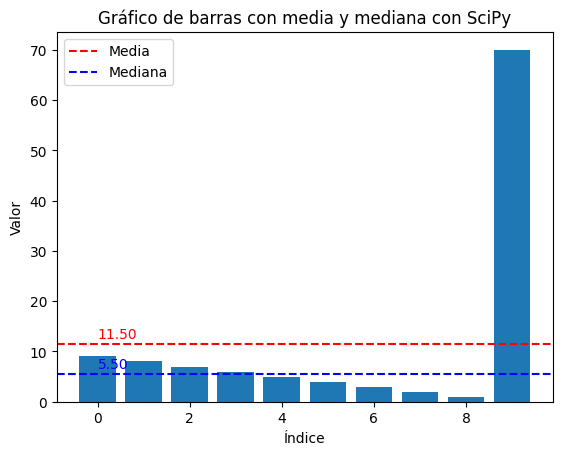

In [42]:
plt.bar(range(len(e)), e)


plt.axhline(y=mean_scipy, color='r', linestyle='--', label='Media')
plt.text(0, mean_scipy + 0.5, f'{mean_scipy:.2f}', ha='left', va='bottom', color='r')

plt.axhline(y=median_scipy, color='b', linestyle='--', label='Mediana')
plt.text(0, median_scipy + 0.5, f'{median_scipy:.2f}', ha='left', va='bottom', color='b')

plt.title('Gráfico de barras con media y mediana con SciPy')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.legend()
plt.show()

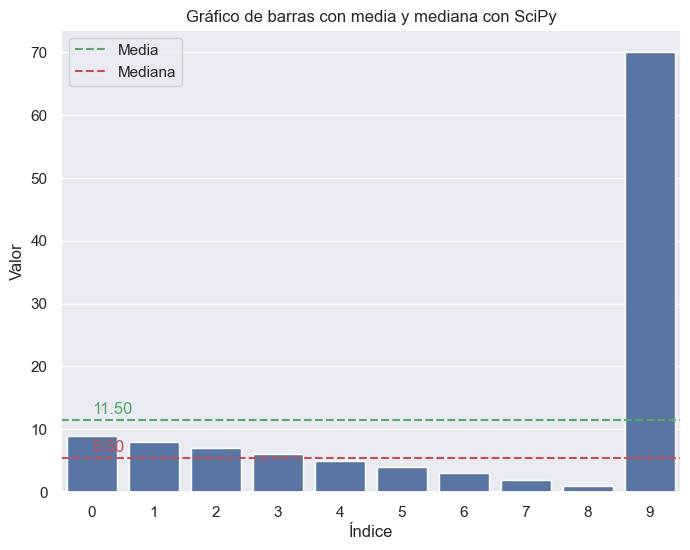

In [43]:
# Crea el gráfico
sns.set()
plt.figure(figsize=(8, 6))
sns.barplot(x=range(len(e)), y=e)

plt.axhline(y=mean_scipy, color='g', linestyle='--', label='Media')
plt.text(0, mean_scipy + 0.5, f'{mean_scipy:.2f}', ha='left', va='bottom', color='g')

plt.axhline(y=median_scipy, color='r', linestyle='--', label='Mediana')
plt.text(0, median_scipy + 0.5, f'{median_scipy:.2f}', ha='left', va='bottom', color='r')

plt.title('Gráfico de barras con media y mediana con SciPy')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.legend()
plt.show()

#### Ejercicio 1: Estimaciones de Ubicación de la Población y las Tasas de Homicidios

La Tabla 1-2 muestra las primeras filas del conjunto de datos que contiene la población y las tasas de homicidios (en unidades de asesinatos por cada 100,000 personas por año) para cada estado de EE. UU. (Censo de 2010).

| Estado       | Población  | Tasa de Homicidios | Abreviatura |
|--------------|-------------|-------------------|-------------|
| Alabama      | 4,779,736   | 5.7               | AL          |
| Alaska       | 710,231     | 5.6               | AK          |
| Arizona      | 6,392,017   | 4.7               | AZ          |
| Arkansas     | 2,915,918   | 5.6               | AR          |
| California   | 37,253,956  | 4.4               | CA          |
| Colorado     | 5,029,196   | 2.8               | CO          |
| Connecticut  | 3,574,097   | 2.4               | CT          |
| Delaware     | 897,934     | 5.8               | DE          |

Calcula la media, la media recortada, la media ponderada y la mediana para la población usando Pandas, Scipy y Pingouine (Opcional: Statsmodels). Utilice el fichero `state.csv`

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
datos = pd.read_csv('Datos/state.csv')
datos.head(4)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


In [53]:
print('Los tipos de datos: \n',datos.dtypes)
print('\nLa forma del dataframe "shape"', datos.shape)


Los tipos de datos: 
 State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

La forma del dataframe "shape" (50, 4)


In [54]:
datos.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [58]:
# Calcular media
mean_scipy = stats.tmean(datos['Population'])
mean_pandas = datos['Population'].mean()
mean_statsmodels =  np.mean(datos['Population'])
# Media usando Pingouin (que utiliza NumPy)
mean_pingouin = datos['Population'].describe().loc['mean']

print("Media usando Scipy:", mean_scipy)
print("\nMedia usando Pandas:", mean_pandas)
print("\nMedia usando Statsmodels:", mean_statsmodels)
print("\nMedia usando Pingouin:", mean_pingouin)

Media usando Scipy: 6162876.3

Media usando Pandas: 6162876.3

Media usando Statsmodels: 6162876.3

Media usando Pingouin: 6162876.3


In [65]:
# Calcular media recortada

trimmed_mean_pandas = datos['Population'].mean(skipna=True)  # default is 0.05
trimmed_mean_scipy = stats.trim_mean(datos['Population'], proportiontocut=0.1)
trimmed_mean_manual = np.mean(np.sort(datos['Population'])[int(0.1*len(datos['Population'])):-int(0.1*len(datos['Population']))])

print("Media recortada con Pandas:", trimmed_mean_pandas)
print("Media recortada con Scipy:", trimmed_mean_scipy)
print("Media recortada manual:", trimmed_mean_manual)

Media recortada con Pandas: 6162876.3
Media recortada con Scipy: 4783697.125
Media recortada manual: 4783697.125


In [67]:
# Calcular media ponderada
pesos = np.random.rand(len(datos))  # Generar pesos aleatorios
media_ponderada_pandas = np.average(datos['Population'], weights=pesos)
media_ponderada_scipy = np.average(datos['Population'], weights=pesos)

print(f"Media ponderada (Pandas): {media_ponderada_pandas}")
print(f"Media ponderada (Scipy): {media_ponderada_scipy}")

Media ponderada (Pandas): 6260254.717854191
Media ponderada (Scipy): 6260254.717854191


In [68]:
# Calcular mediana
mediana_pandas = datos['Population'].median()
mediana_scipy = np.median(datos['Population'])
# mediana_pingouin = pg.describe(datos['Population'])['median']
mediana_statsmodels = datos['Population'].describe()['50%']

print(f"Mediana (Pandas): {mediana_pandas}")
print(f"Mediana (Scipy): {mediana_scipy}")
# print(f"Mediana (Pingouin): {mediana_pingouin}")
print(f"Mediana (Statsmodels): {mediana_statsmodels}")

Mediana (Pandas): 4436369.5
Mediana (Scipy): 4436369.5
Mediana (Statsmodels): 4436369.5


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_1208\4132521257.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos['Population'], kde=True)


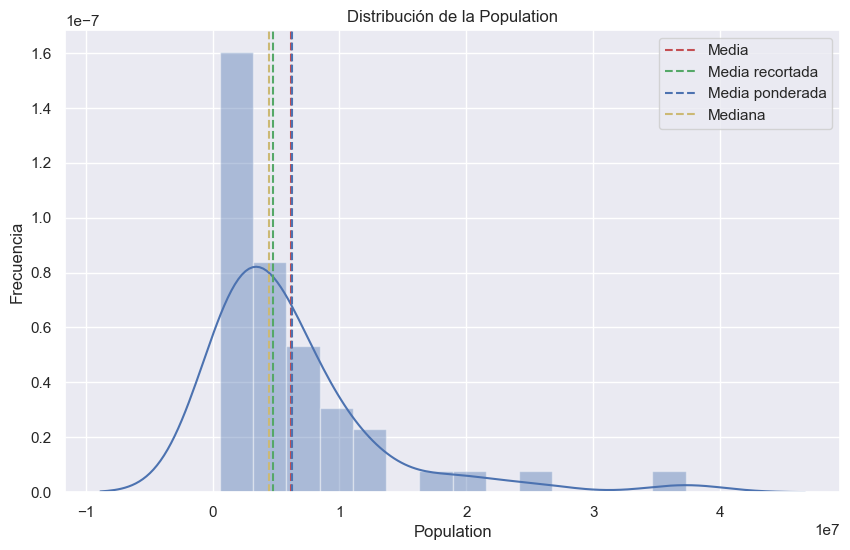

In [70]:
# Gráfico para visualizar los resultados
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(datos['Population'], kde=True)
plt.axvline(mean_pandas, color='r', linestyle='--', label='Media')
plt.axvline(trimmed_mean_scipy, color='g', linestyle='--', label='Media recortada')
plt.axvline(media_ponderada_pandas, color='b', linestyle='--', label='Media ponderada')
plt.axvline(mediana_pandas, color='y', linestyle='--', label='Mediana')
plt.legend()
plt.title('Distribución de la Population')
plt.xlabel('Population')
plt.ylabel('Frecuencia')
plt.show()

#### Ejercicio 2. Investigar cómo se interpreta estadísticamente la medida de tendecia central: `moda`.  
Buscar ejemplos concretos donde se aplique la moda. Desarrolle un ejemplo con Pandas, Scipy, Statsmodels y Pingouine

In [73]:
import statistics

d = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

In [87]:
# Moda con la libreria statistics 
mode_sts = statistics.mode(d)
# Moda con Pandas: 
serie = pd.Series(d)
mode_pandas = serie.mode()[0]
# Moda con SciPy: 
mode_scipy = stats.mode(d)[0]
# Moda con Statsmodels
mode_statsmodels = serie.value_counts().index[0]
# Moda con Pingouin
mode_pingouin = stats.mode(d)[0]


print("La moda (Statistics):", mode_sts)
print("La moda (Pandas):", mode_pandas)
print("La moda (SciPy):", mode_scipy)
print("La moda (Statsmodels):", mode_statsmodels)
print("La moda (Pingouin):", mode_pingouin)

La moda (Statistics): 4
La moda (Pandas): 4
La moda (SciPy): 4
La moda (Statsmodels): 4
La moda (Pingouin): 4
